In [141]:
%load_ext autoreload
%autoreload 2

In [142]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [116]:
cmap = matplotlib.colormaps['Dark2']

In [138]:
def create_combined_radial_plot(labels, data, colors, names, title='Combined Radial Plot', figsize=(8, 6)):
    """
    Create a single radial plot with multiple data series.

    Parameters:
        labels (list): Categories for each axis.
        data (list of lists): Multiple datasets' values for each category.
        colors (list of str): Colors for each dataset.
        title (str): Title for the plot.
        figsize (tuple): Figure size for the plot.

    Usage:
        labels = ['A', 'B', 'C', 'D', 'E']
        data = [
            [4, 3, 2, 5, 4],
            [1, 2, 3, 4, 5],
            [5, 4, 3, 2, 1]
        ]
        colors = ['red', 'green', 'blue']
        create_combined_radial_plot(labels, data, colors)
    """
    # Create a polar subplot
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    
    # Number of variables
    num_vars = len(labels)
    
    # Compute angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop
    
    # Plot each dataset
    for values, color, name in zip(data, colors, names):
        # Extend values to close the plot
        extended_values = np.concatenate((values, [values[0]]))
        
        # Draw the plot
        # ax.fill(angles, extended_values, color=color, alpha=0.25)
        ax.plot(angles, extended_values, color=color, label=name)

    # Labels for each point
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.grid(True, alpha=0.5)
    
    # Title and legend
    # plt.title(title)
    # plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
    plt.legend(loc='best', fontsize="20", bbox_to_anchor=(0, 1))
    
    # Display the plot
    plt.tight_layout()
    # plt.show()
    plt.savefig(title+'.png', dpi=500)

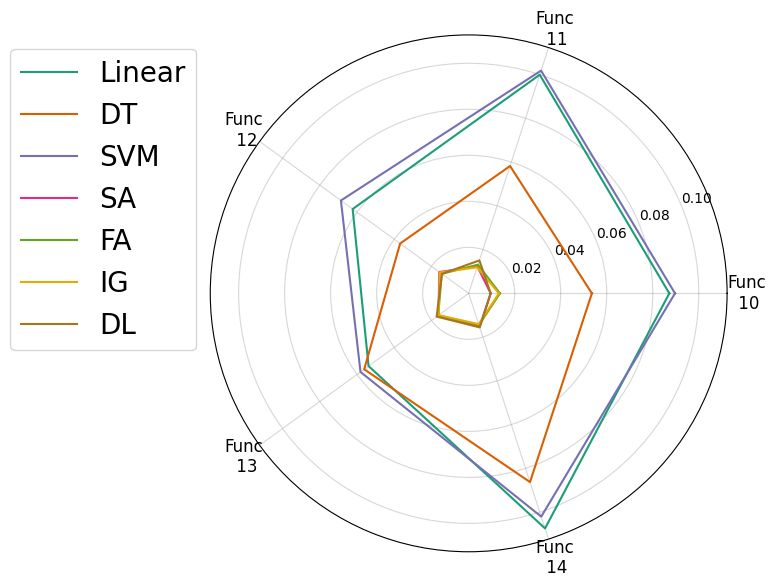

In [139]:
# Example usage:
labels = ['Func\n 10', 'Func\n 11', 'Func\n 12', 'Func\n 13', 'Func\n 14']
data = [
    [0.087207, 0.099922, 0.062339, 0.053792, 0.107437],
    [0.053553, 0.058203, 0.036827, 0.056149, 0.086263],
    [0.089687, 0.101809, 0.068647, 0.058134, 0.102051],
    [0.009554, 0.012298, 0.015758, 0.016267, 0.015344],
    [0.013587, 0.013095, 0.014453, 0.016377, 0.014467],
    [0.013134, 0.011906, 0.015505, 0.016147, 0.014088],
    [0.009569, 0.015060, 0.014370, 0.017202, 0.015563],
]
colors = cmap.colors[:len(data)]
names = ['Linear', 'DT', 'SVM', 'SA', 'FA', 'IG', 'DL']
create_combined_radial_plot(labels, data, colors, names, 'Mean Absolute Error')
# plt.savefig('mae.png', dpi=300)

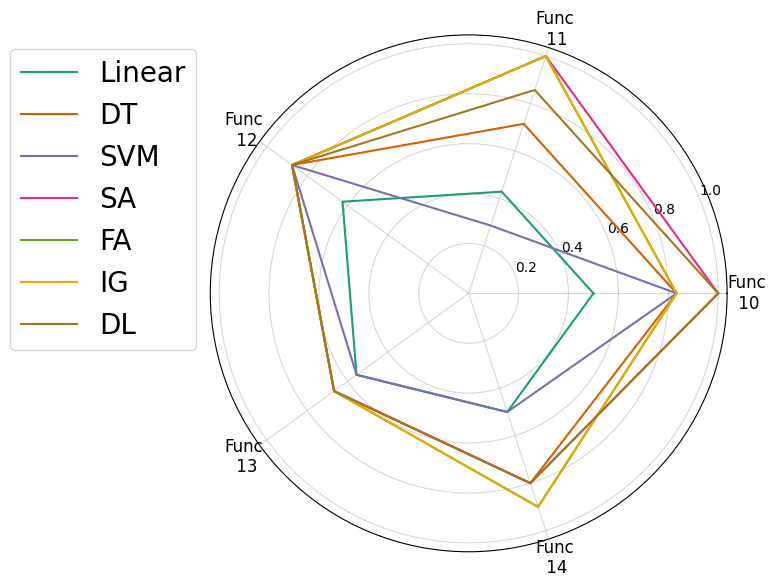

In [140]:
# Example usage:
labels = ['Func\n 10', 'Func\n 11', 'Func\n 12', 'Func\n 13', 'Func\n 14']
data = [
    [0.5, 0.428571, 0.625, 0.555556, 0.5],
    [0.833333, 0.714286, 0.875, 0.666667, 0.8],
    [0.833333, 0.285714, 0.875, 0.555556, 0.5],
    [1, 1, 0.875, 0.666667, 0.8],
    [0.833333, 1, 0.875, 0.666667, 0.9],
    [0.833333, 1, 0.875, 0.666667, 0.9],
    [1, 0.857143, 0.875, 0.666667, 0.8],
]
colors = cmap.colors[:len(data)]
names = ['Linear', 'DT', 'SVM', 'SA', 'FA', 'IG', 'DL']
create_combined_radial_plot(labels, data, colors, names, 'Functional Precision')
# plt.savefig('fp.png', dpi=300)

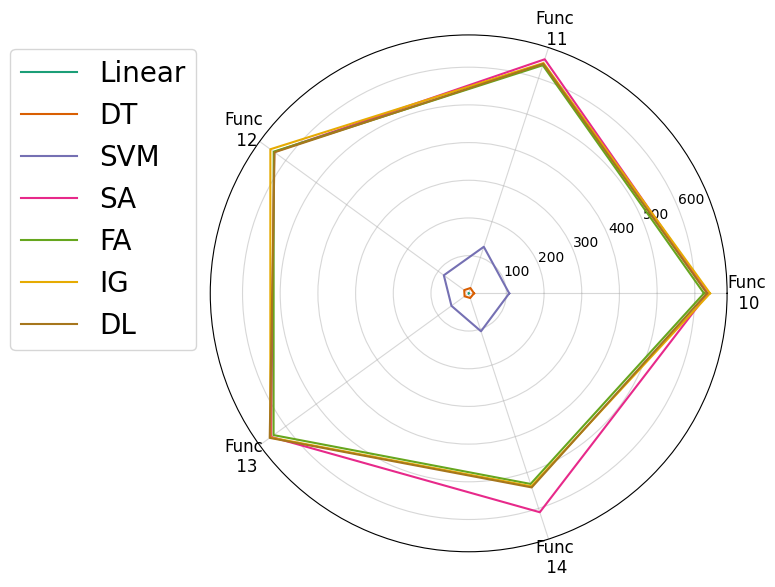

In [143]:
# Example usage:
labels = ['Func\n 10', 'Func\n 11', 'Func\n 12', 'Func\n 13', 'Func\n 14']
data = [
    [0.1666, 0.1581, 0.1511, 0.1707, 0.1810],
    [14.192, 14.831, 14.549, 13.370, 12.9710],
    [107.579, 129.854, 81.491, 56.448, 105.811],
    [634.560, 652.961, 637.956, 647.943, 610.626],
    [624.233, 636.256, 639.468, 639.843, 531.713],
    [640.382, 642.431, 650.347, 650.493, 538.213],
    [632.058, 640.178, 636.672, 652.432, 541.390],
]
log_data = np.log(1+np.array(data))
colors = cmap.colors[:len(data)]
names = ['Linear', 'DT', 'SVM', 'SA', 'FA', 'IG', 'DL']
create_combined_radial_plot(labels, data, colors, names, 'Running Time -- log(T+1)')